<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

# TS2: Sistemas Lineales e Invariantes en el Tiempo
**Alumna:** Agustina Rocío Paolini Rosso  
**Carrera:** Ingeniería Biomédica  
**Materia:** Análisis y Procesamiento de Señales  
**Fecha:** Septiembre 2025  

## Consigna
1. Dada la siguiente ecuación en diferencias que modela un sistema LTI:

$$
y[n] = 3 \cdot 10^{-2} \cdot x[n] + 5 \cdot 10^{-2} \cdot x[n-1] + 3 \cdot 10^{-2} \cdot x[n-2] + 1.5 \cdot y[n-1] - 0.5 \cdot y[n-2] \tag{1}
$$
- Graficar la señal de salida para cada una de las señales de entrada generadas en el **TS1**, considerando que las señales son causales.  
- Hallar la respuesta al impulso y, usando la misma, repetir la generación de la salida para alguna de las señales de entrada consideradas.  
- En cada caso, indicar: frecuencia de muestreo, tiempo de simulación y potencia o energía de la señal de salida. 

2. Hallar la respuesta al impulso y la salida correspondiente a una señal de entrada sinusoidal en los sistemas definidos mediante las siguientes ecuaciones en diferencias:

$$
y[n] = x[n] + 3 \cdot x[n-10] \tag{A}
$$

$$
y[n] = x[n] + 3 \cdot y[n-10] \tag{B}
$$

3. *Bonus*:
- Discretizar la siguiente ecuación diferencial correspondiente al modelo de **Windkessel**, que describe la dinámica presión-flujo del sistema sanguíneo:

$$
C \cdot \frac{dP}{dt} + \frac{1}{R} \cdot P = Q \tag{2}
$$
Considerar valores típicos de **Compliance** y **Resistencia vascular**.

## Introducción teórica

En el presente trabajo se estudian los sistemas lineales invariantes en el tiempo (LTI), que constituyen una de las bases fundamentales del procesamiento de señales. Estos sistemas se caracterizan por dos propiedades esenciales:

- Linealidad: el sistema cumple los principios de superposición y homogeneidad. Esto significa que si la entrada es una combinación lineal de señales, la salida será la misma combinación lineal de las respuestas individuales.  
- Invariancia en el tiempo: el comportamiento del sistema no cambia con el tiempo. Si una entrada se desplaza temporalmente, la salida resultará también desplazada en la misma magnitud.  

Gracias a estas propiedades, un sistema LTI queda completamente caracterizado por su **respuesta al impulso**.

La respuesta al impulso, denotada $h[n]$, es la salida del sistema ante una entrada delta discreta $\delta[n]$, es decir, cuando la entrada es un impulso unitario discreto. Esta señal es fundamental porque permite calcular la salida ante cualquier entrada mediante la convolución discreta:

$$
y[n] = x[n] * h[n] = \sum_{k=-\infty}^{\infty} x[k] \, h[n-k]
$$

Esto se debe a que cualquier señal discreta $x[n]$ puede representarse como una combinación lineal de impulsos desplazados $\delta [n-k]$. Por la propiedad de linealidad, la respuesta del sistema a esa combinación es la suma de las respuestas individuales y, debido a la invarianza en el tiempo, la respuesta a un impulso desplazado $\delta [n-k]$ es simplemente $h[n-k]$. De este modo, la salida general se obtiene sumando todas esas respuestas escaladas y desplazadas, lo que conduce naturalmente a la operación de convolución. En consecuencia, convolucionar la entrada con la respuesta al impulso reproduce exactamente el comportamiento del sistema y constituye una forma **equivalente** a resolver directamente la ecuación en diferencias. 

En la práctica, la convolución numérica se puede implementar de manera directa mediante `np.convolve` o indirecta mediante funciones como `lfilter`, que utilizan internamente la ecuación en diferencias.

Cuando un sistema se describe en forma continua mediante una ecuación diferencial, es necesario discretizarlo para poder simularlo numéricamente. Es así que, muchos sistemas LTI se representan mediante **ecuaciones en diferencias** que relacionan las muestras de la señal de salida $y[n]$ con las muestras de entrada $x[n]$ y, en algunos casos, con salidas pasadas. 

Para pasar de una ecuación diferencial a una ecuacion en diferencias se emplea un método sencillo que es *Euler de un paso*, donde la derivada se aproxima por diferencias finitas:

$$
\frac{dP}{dt} \approx \frac{P[n+1] - P[n]}{t_s} \tag{3}
$$

De esta forma, un ejemplo general de ecuación en diferencias es:

$$
y[n] + a_1 y[n-1] + \dots + a_N y[n-N] = b_0 x[n] + b_1 x[n-1] + \dots + b_M x[n-M]
$$

donde los coeficientes $a_k$ y $b_k$ determinan el comportamiento del sistema.  

Cuando la salida depende solo de la entrada y retardos de la misma, el sistema es FIR (Finite Impulse Response), ya que su respuesta al impulso tiene duración finita. Estos sistemas son inherentemente estables y no tienen retroalimentación. Por otro lado, cuando la salida depende también de salidas pasadas, el sistema es IIR (Infinite Impulse Response), porque su respuesta al impulso es de duración infinita, es decir, ocurre una retroalimentación. En la ecuación de diferencias se incluyen términos de la salida y son más eficientes en cuanto a memoria, pero requieren de un análisis cuidadoso de la estabilidad.  

Como se estudió en la *TS1*, la energía se calcula para las señales de duración finita, cuya expresión está dada por:

$$
E = \sum_{n=0}^{N-1} |x[n]|^2 \cdot t_s
$$

Y la potencia se calcula para señales periódicas o infinitas:

$$
P = \frac{E}{N \cdot T_s} = \frac{1}{N}\sum_{n=0}^{N-1} |x[n]|^2
$$

El objetivo de este trabajo es implementar y analizar distintos sistemas LTI utilizando Python, empleando librerías como `NumPy`, `Matplotlib` y `SciPy`. Se simularán diferentes señales de entrada, que se considerarán como causales, es decir,
$$
x[n] = 0 \quad \text{para todo} \quad n < 0
$$

Y se calcularán respuestas al impulso, evaluando la energía o potencia de las señales de salida. Finalmente, se abordará el caso de un sistema descripto originalmente por una ecuación diferencial (modelo de Windkessel en fisiología) y se discretizará para su análisis numérico, mostrando la importancia de la discretización en la simulación de modelos dinámicos en biomedicina. 

---

## Análisis y desarrollo
En primer lugar, se simuló el sistema LTI definido por la ecuación de diferencias (1) y se obtuvo su respuesta al impulso $h_1 [n]$.

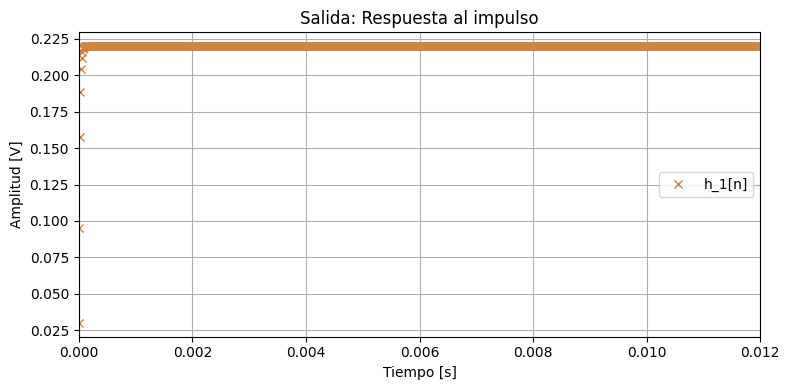

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, square


fs = 100000        # frecuencia de muestreo [Hz]
ts = 1 / fs
nn = 1200             # cantidad de muestras
tt = np.arange(nn) * ts  # Vector de tiempo

# ----------------------------- Sistema dado ------------------------------
# y[n] = 0.03 x[n] + 0.05 x[n-1] + 0.03 x[n-2] + 1.5 y[n-1] - 0.5 y[n-2]
b = np.array([0.03, 0.05, 0.03])    #Entrada x
a = np.array([1, -1.5, 0.5])        #Salida y (muevo hacia el otro lado)

# ----------------------------- Respuesta al impulso ----------------------
imp = np.zeros(nn)
imp[0] = 1.0
h_1 = lfilter(b, a, imp)

plt.figure(figsize=(8,4))
plt.plot(tt, h_1, 'x', color='peru', label='h_1[n]')
plt.title('Salida: Respuesta al impulso')
plt.legend(loc='center right')
plt.xlabel('Tiempo [s]')
plt.xlim(0,0.012)
plt.ylabel('Amplitud [V]')
plt.grid(True)
plt.tight_layout()
plt.show()

El sistema LTI simulado corresponde a un sistema IIR porque se incluyen términos de la salida pasada. Con el fin de representarlo en el dominio discreto se definieron los vectores de coeficientes $b = [0.03, 0.05, 0.03]$, que corresponde a la entrada, y $a = [1, -1.5, 0.5]$, que corresponde a la salida.

Para obtener la respuesta al impulso se aplicó una delta discreta como entrada y se la filtró con `lfilter`. Esta función `scipy.signal.lfilter(b, a, x)` implementa ecuaciones en diferencias lineales del tipo:
$$
y[n] = \frac{1}{a_0} (b_0 x[n] + b_1 x[n-1] + ... + b_M x[n-M] - a_1 y[n-1] - ... - a_N y[n-N]
$$

donde $b = [b_0, b_1, ..., b_M]$ son los coeficientes asociados a la entrada y $a = [1_0, a_1, ..., a_N]$ son los coeficientes asociados a la salida. 

Se trata de un motor que va calculando $y[n]$ paso a paso utilizando la ecuación en diferencias y las condiciones iniciales que, en este caso como las señales se consideran causales, son cero.  
Al aplicarla para obtener la respuesta al impulso, se van generando los valores de $h_1 [n]$ tal como se observa en el gráfico. Después de un comienzo transitorio, donde los valores crecen rápidamente, la respuesta al impulso deja de variar y queda prácticamente constante en $\approx 0.225$. Esto implica que el sistema, ante un impulso breve, conserva memoria indefinidamente: un único impulso de entrada deja un efecto permanente en la salida, es decir, la “huella” del impulso no desaparece con el tiempo, sino que se transforma en un nivel constante.

---
Luego, se tomaron las señales generadas en la *TS1* como entrada para obtener, mediante los dos métodos solicitados y definidos, la salida del sistema. A fines de organizar este informe, primero se analizó como entrada la señal sinusoidal de `2000 Hz`:

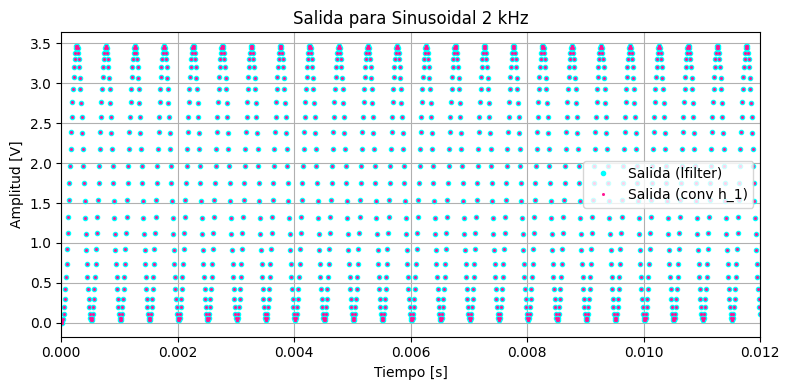



Entrada: Sinusoidal 2 kHz
Frecuencia de muestreo: 100000 Hz
Tiempo de simulación: 0.0120 s
Potencia de la salida con lfilter: 4.5317 W
Potencia de la salida con respuesta al impulso: 4.5317 W


In [4]:
#--------------------- Señales TS1 ------------------------------
# 1) Senoidal 2 kHz
ff_1 = 2000  # Hz
sen_1 = np.sin(2*np.pi*ff_1*tt)


def energia_discreta(x, ts):
    return np.sum(np.abs(x)**2) * ts

def potencia_discreta(x):
    return np.mean(np.abs(x)**2)


# -------- Simulación de una señal --------
def simular_senal(x, tt, nombre, b, a, h, fs, ts, graficar=True):
    
    # Respuesta usando lfilter
    y = lfilter(b, a, x)                    #Método por ecuación en diferencias
    
    # Respuesta con convolución directa
    y_conv = np.convolve(x, h)[:len(x)]     #Método con respuesta al impulso
    
    if graficar:
        plt.figure(figsize=(8,4))
        plt.plot(tt, y, 'o', color='aqua', label='Salida (lfilter)', markersize=3)
        plt.plot(tt, y_conv, 'x', color='deeppink', label='Salida (conv h_1)', markersize=1.5)
        plt.title(f'Salida para {nombre}')
        plt.legend(loc='center right')
        plt.xlabel('Tiempo [s]')
        plt.xlim(0,0.012)
        plt.ylabel('Amplitud [V]')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    print('\n')
    print(f'Entrada: {nombre}')
    print(f'Frecuencia de muestreo: {fs} Hz')
    print(f'Tiempo de simulación: {len(x)/fs:.4f} s')
    
    
    # Energía/potencia
    if nombre == 'Pulso 10 ms':
        energia_lfilter = energia_discreta(y, ts)
        energia_conv = energia_discreta(y_conv, ts)
        print(f'Energía de la salida con lfilter: {energia_lfilter:.4f} J')
        print(f'Energía de la salida con respuesta al impulso: {energia_conv:.4f} J')
        
    else:
        potencia_lfilter = potencia_discreta(y)
        potencia_conv = potencia_discreta(y_conv)
        print(f'Potencia de la salida con lfilter: {potencia_lfilter:.4f} W')
        print(f'Potencia de la salida con respuesta al impulso: {potencia_conv:.4f} W')


simular_senal(sen_1, tt, 'Sinusoidal 2 kHz', b, a, h_1, fs, ts, graficar=True)

La señal sinusoidal de `2000 Hz` empleada se genera de manera discreta utilizando una frecuencia de muestreo de `fs = 100000 1/s`, con un vector de tiempo de `tt = 12 ms` correspondiente a `nn = 1200 muestras`.  

La funcion `simular_senal` procesa esta señal de dos maneras: mediante `lfilter` que implementa directamente la ecuación en diferencias y mediante la convolución de la señal con la respuesta al impulso $h_1[n]$. De esta forma, se comparan los dos enfoques equivalentes de simulación de un sistema LTI. 

En el gráfico se observa que la salida para ambos métodos es una onda sinusoidal de amplitud constante de `2000 Hz`, ya que la misma, al tener un período de 
$$
T = \frac{1}{ff_1} =  \frac{1}{2000 \, \text{Hz}} = 0.0005 \, \text{s} = 0.5 \, \text{ms}
$$

En un `tt = 12 ms` realiza
$$
\frac{12 \, \text{ms}}{0.5 \, \text{ms}} = 24 \, \text{ciclos completos}
$$
tal como se observa en el gráfico.

Y las dos curvas obtenidas por `lfilter` y el producto de convolución coinciden perfectamente, lo que demuestra que ambos métodos son equivalentes para obtener salidas de sistemas LTI. 

La señal de salida presenta una amplitud mayor a la amplitud de la señal de entrada, se encuentra desplazada y tiene un offset que hace que oscile aproximadamente entre `0 V` y `3.5 V`. Esto se debe al efecto del sistema LTI sobre la entrada que, tal como se observó en su respuesta al impulso, acumula de manera constante los valores de la señal aplicada. En consecuencia, la entrada sinusoidal de promedio nulo produce una salida con desplazamiento permanente respecto al cero. 

En relación a la potencia de la salida, con ambos métodos se obtiene el mismo valor, que es muy superior a la potencia de la entrada del sistema (como se había analizado en la *TS1*, la potencia para una señal sinusoidal de `amplitud = 1` es `P = 0.5 W`). Por lo que el sistema actúa como un amplificador, agregando energía a la señal, ya que hay ganancia de potencia positiva. 

---

Luego, se analizó la señal sinusoidal `sen_2`, desfasada en `π/2` y amplificada en `4 V`:

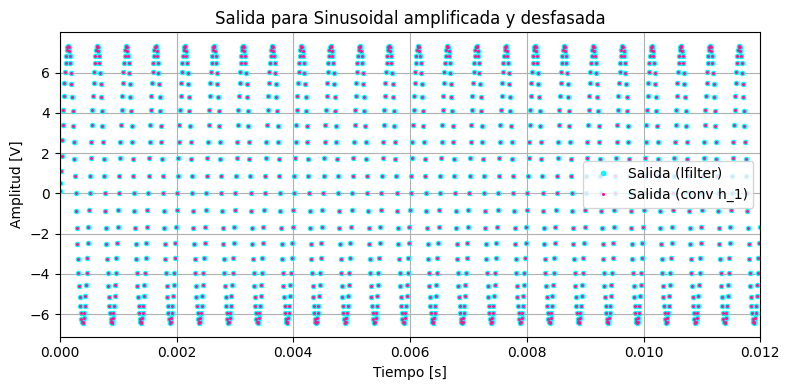



Entrada: Sinusoidal amplificada y desfasada
Frecuencia de muestreo: 100000 Hz
Tiempo de simulación: 0.0120 s
Potencia de la salida con lfilter: 23.7917 W
Potencia de la salida con respuesta al impulso: 23.7917 W


In [5]:
# 2) Amplificada y desfasada π/2
sen_2 = 4*np.sin(2*np.pi*ff_1*tt + np.pi/2)

simular_senal(sen_2, tt, 'Sinusoidal amplificada y desfasada', b, a, h_1, fs, ts, graficar=True)

En este caso, la salida presenta una oscilación de mayor amplitud: aproximadamente entre `–6 V` y `6 V`. Esto se debe a que el sistema acumula los valores de entrada, y al ser la señal de entrada de mayor amplitud que `sen_1`, la contribución acumulativa resulta más intensa. A diferencia de la primera sinusoidal, el desfase inicial provoca que el efecto de acumulación no genere desplazamientos de la señal hacia valores positivos, sino que oscila alrededor del cero.

En relación a la potencia, la salida, al tener un valor mayor de amplitud, tiene mayor potencia que la entrada, al igual que se observó con `sen_1`, lo que indica que el sistema actúa como un amplificador, agregando más energía a la señal. 

---
Al tomar la señal `sen_3` modulada en amplitud, se observó lo siguiente:

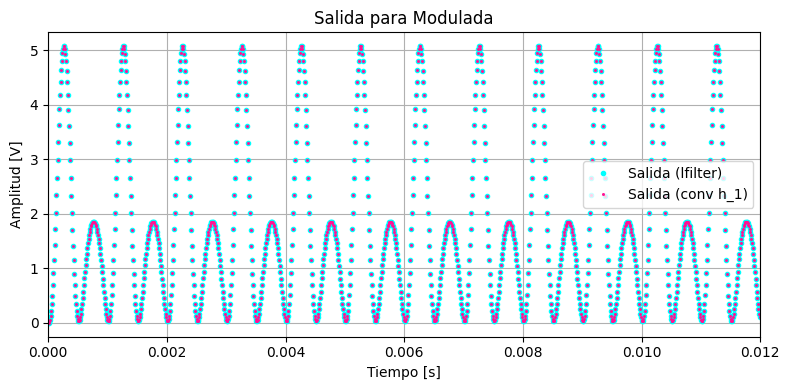



Entrada: Modulada
Frecuencia de muestreo: 100000 Hz
Tiempo de simulación: 0.0120 s
Potencia de la salida con lfilter: 5.3520 W
Potencia de la salida con respuesta al impulso: 5.3520 W


In [6]:
# 3) Modulada en amplitud
ff_mod = 1000
m = 0.7
s_moduladora = np.sin(2*np.pi*ff_mod*tt)
sen_3 = (1 + m*s_moduladora) * sen_1

simular_senal(sen_3, tt, 'Modulada', b, a, h_1, fs, ts, graficar=True)

Cuando la señal modulada en amplitud pasa por el sistema, la portadora y sus bandas laterales se distorsionan por la acción de la ecuación en diferencias. El sistema amplifica con realimentación, por lo que aparecen picos grandes y chicos en la salida, y la envolvente de la modulada se deforma. Es así que la salida presenta un offset que la hace oscilar alrededor de un punto mayor al cero.

La potencia de la salida es mayor que la potencia de la señal de entrada por el aumento en la amplitud de los picos de la onda. 

---
A continuación, se estudió la señal `sen_4`, que corresponde a la señal recortada en amplitud.

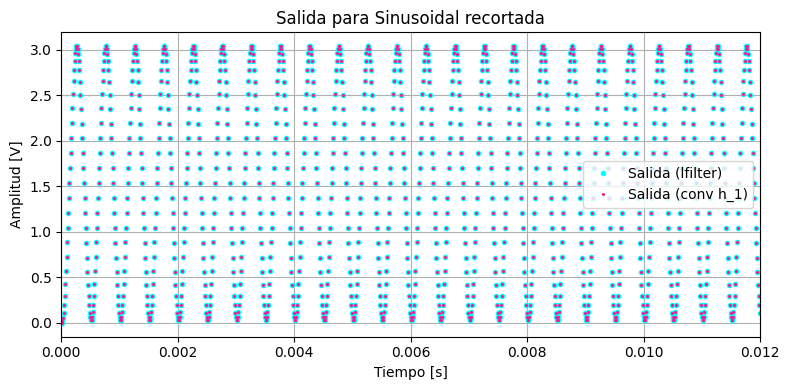



Entrada: Sinusoidal recortada
Frecuencia de muestreo: 100000 Hz
Tiempo de simulación: 0.0120 s
Potencia de la salida con lfilter: 3.4405 W
Potencia de la salida con respuesta al impulso: 3.4405 W


In [7]:
# 4) Señal recortada en amplitud al 75%
def recorte_por_amplitud(x, factor=0.75):
    A = np.max(np.abs(x))
    u = factor * A
    return np.clip(x, -u, u), u

sen_4, _ = recorte_por_amplitud(sen_1, 0.75)

simular_senal(sen_4, tt, 'Sinusoidal recortada', b, a, h_1, fs, ts, graficar=True)

Al igual que en las salidas anteriores, los dos métodos de cálculo empleados coinciden, lo que confirma su equivalencia para analizar sistemas LTI.

En cuanto al resultado gráfico, se observa un comportamiento muy parecido al obtenido con la señal de entrada `sen_1`. Esto se debe a que la señal `sen_4` no es más que `sen_1` con su amplitud reducida al 75%.

Por esta razón, la salida mantiene el mismo desfase y el mismo offset que en el primer caso, pero su amplitud resulta menor. Aunque la salida sigue siendo mayor que la entrada, ya no alcanza los valores máximos de la primera simulación.

Con la potencia ocurre algo similar: al tener una amplitud reducida, la potencia de salida también disminuye en comparación con la primera salida. De hecho, como la entrada es exactamente un 75% de la señal original, la potencia de salida se reduce aproximadamente en la misma proporción, es decir, al 75% de la obtenida inicialmente. 

---
Seguidamente, se analizó la señal cuadrada de frecuencia `4000 Hz`:

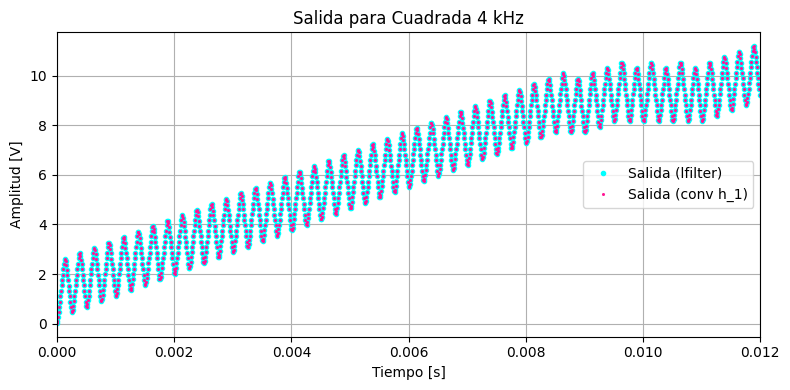



Entrada: Cuadrada 4 kHz
Frecuencia de muestreo: 100000 Hz
Tiempo de simulación: 0.0120 s
Potencia de la salida con lfilter: 47.6624 W
Potencia de la salida con respuesta al impulso: 47.6624 W


In [8]:
# 5) Cuadrada 4 kHz
ff_2 = 4000
sen_5 = square(2*np.pi*ff_2*tt)

simular_senal(sen_5, tt, 'Cuadrada 4 kHz', b, a, h_1, fs, ts, graficar=True)

Cuando la onda cuadrada de 4 kHz se utiliza como entrada, el sistema responde amplificando progresivamente las transiciones de la señal. Esto ocurre porque cada cambio de nivel de la onda cuadrada (de 1 a -1, o viceversa) actúa como un pequeño impulso, que excita la dinámica interna del sistema.

La parte recursiva de la ecuación en diferencias acumula estos aportes, generando un crecimiento sostenido en la amplitud de la señal de salida. Como consecuencia, en el gráfico se observa que la salida no se mantiene acotada como en las anteriores simulaciones, sino que presenta picos cada vez mayores en valor.

En términos de potencia, este crecimiento implica que el valor promedio de la potencia calculada con las primeras muestras es menor que el que se obtendría al extender la simulación. Es decir, la potencia de la salida no se estabiliza, sino que continúa aumentando con el tiempo. Si se toma una mayor cantidad de muestras, aumentando el tiempo de simulación, se observa un aumento en el valor de la potencia de la salida, contrario a lo que ocurre con las anteriores salidas. 

---
Finalmente, se analizó el pulso de `10 ms` como entrada del sistema:

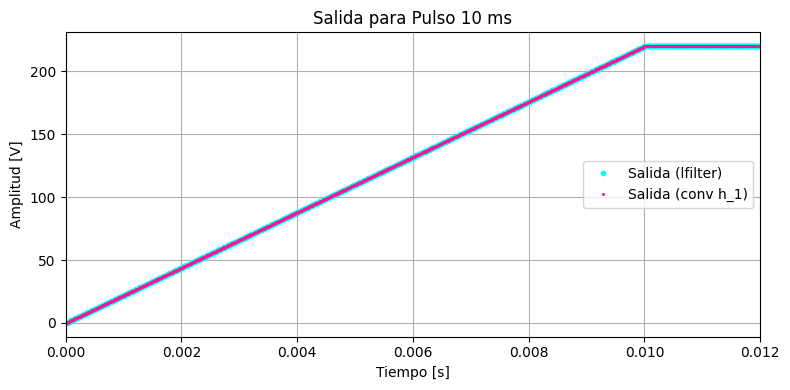



Entrada: Pulso 10 ms
Frecuencia de muestreo: 100000 Hz
Tiempo de simulación: 0.0120 s
Energía de la salida con lfilter: 257.4062 J
Energía de la salida con respuesta al impulso: 257.4062 J


In [9]:
# 6) Pulso rectangular 10 ms dentro de ventana de 12 ms
nn_pulso = int(12e-3*fs)
tt_pulso = np.arange(nn_pulso)*ts
sen_6 = np.zeros_like(tt_pulso)
n_pulso = int(10e-3*fs)
sen_6[:n_pulso] = 1.0

simular_senal(sen_6, tt_pulso, 'Pulso 10 ms', b, a, h_1, fs, ts, graficar=True)

Al aplicar como entrada un pulso rectangular de `10 ms`, la salida comienza a crecer mientras dura el pulso, ya que la señal activa excita continuamente la dinámica interna del sistema. Una vez finalizado el pulso, la entrada se anula, pero la salida no desaparece de inmediato debido a los términos recursivos de la ecuación en diferencias, que hacen que la señal continúe oscilando e incluso amplificándose. Por ello, durante los primeros `10 ms` la salida es una onda en crecimiento. Luego, la salida no desaparece, sino que continúa evolucionando sola por la retroalimentación del sistema.

Como la entrada es de duración finita, lo que se calcula en este caso es la energía de la salida. El resultado muestra que el sistema acumula energía durante el pulso y también después, mientras la salida sigue evolucionando por sí sola. De esta forma, al igual que con la anterior simulación, la energía crece a medida que se aumenta el tiempo de simulación o que se toma una mayor cantidad de muestras `nn`.

---
Para el segundo punto, se modeló el sistema LTI descripto por la ecuación (A), se buscó su respuesta al impulso, $h_A [n]$ y, tomando como entrada una señal sinusoidal de frecuencia `f_seno = 2000 Hz`, se graficó la salida del mismo. 

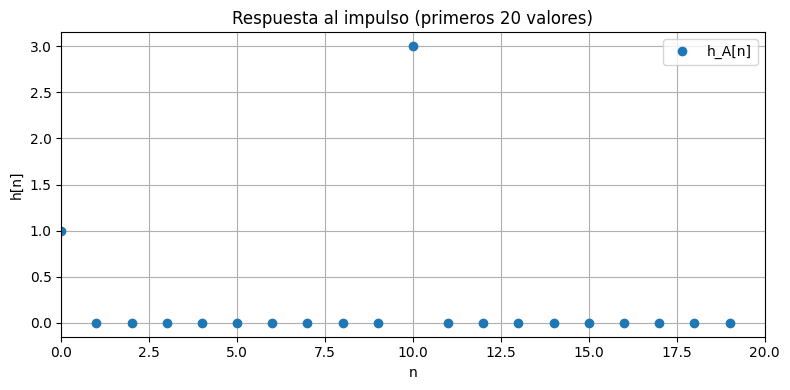

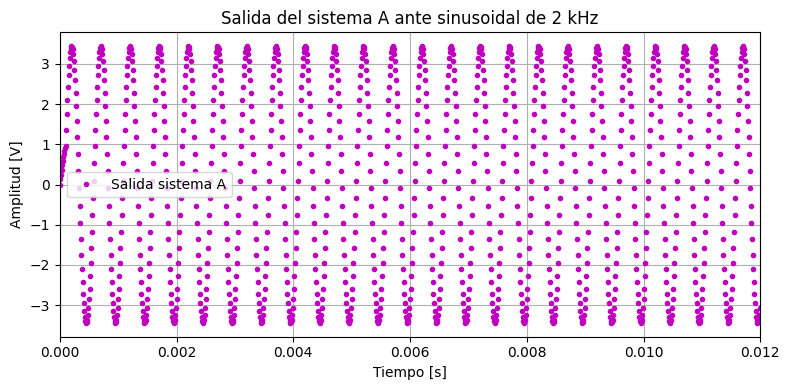

In [10]:
# Entrada sinusoidal de prueba
f_seno = 2000
x_seno = np.sin(2*np.pi*f_seno*tt)

# Sistema A: y[n] = x[n] + 3 x[n-10]
demora = 10
hA = np.zeros(nn)  #respuesta al impulso sistema A
hA[0] = 1
if demora < nn:
    hA[demora] = 3      #Hay salida 1 en n=0 y 3 en n=10  (necesito delta[0])

# Salida sistema A
yA = np.convolve(x_seno, hA)[:nn]  #y[n] = x[n] * hA[n].


# -------- Graficar respuesta al impulso --------
plt.figure(figsize=(8,4))
plt.plot(hA[:20], 'o', label='h_A[n]')
plt.title("Respuesta al impulso (primeros 20 valores)")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.xlim(0, 20)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------- Graficar salida --------
plt.figure(figsize=(8,4))
plt.plot(tt, yA, 'o', color='m', label='Salida sistema A', markersize=3)
plt.xlim(0, 0.012)
plt.title("Salida del sistema A ante sinusoidal de 2 kHz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El sistema A es de tipo FIR, ya que solo depende de los valores presentes y pasados de la entrada, es decir, no hay recursividad. En el código, se construyó su respuesta al impulso como la secuencia $h_A [n]=\delta [n] + 3 \delta [n-10]$, es decir, un valor unitario en el instante inicial y otro retrasado diez muestras, con ganancia de tres. Al convolucionar esta respuesta con la entrada sinusoidal de `2000 Hz`, la salida resultó ser la suma de la señal original y una réplica desplazada en el tiempo.

Al graficar la respuesta al impulso, se observa que la misma toma valores donde se definieron sus $\delta$, es decir en `n = 0` vale `1` y en `n = 10` vale 3.

En el segundo gráfico se observa que la frecuencia de la señal de salida continúa en `2000 Hz`, sin embargo, la amplitud de la salida es mayor que la amplitud de la señal de entrada y la fase también se modificó. El sistema suma la señal original con una versión desplazada y amplificada de sí misma, lo que crea interferencia constructiva y destructiva que modifica la amplitud resultante, pero la frecuencia fundamental permanece sin alteraciones.

---
Luego, se modeló el sistema descripto por (B), se buscó su respuesta al impulso, $h_B [n]$ y, al igual que con el sistema A, se tomó una señal sinusoidal de frecuencia `2000 Hz` de entrada y se graficó su salida.

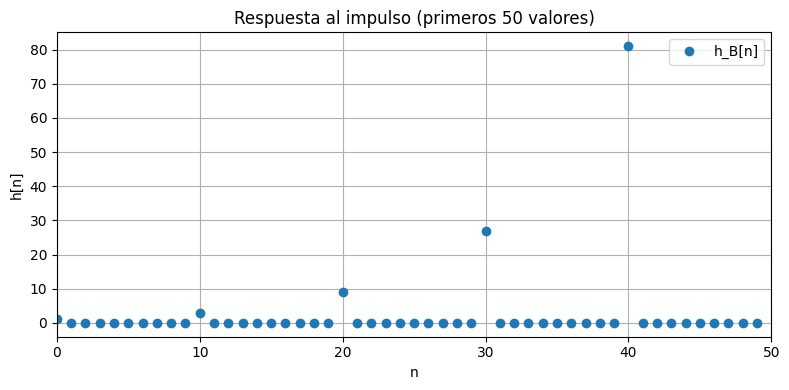

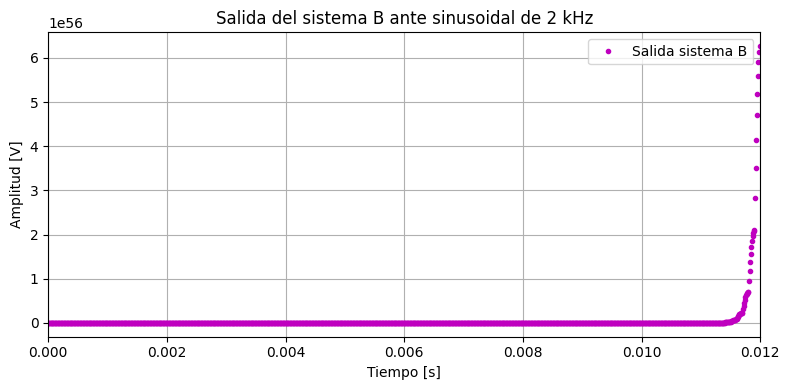

In [11]:
# Sistema B: y[n] = x[n] + 3 y[n-10]
bB = [1]
aB = np.zeros(demora+1)
aB[0] = 1
aB[demora] = -3
imp = np.zeros(nn)
imp[0] = 1                   # pulso unitario
hB = lfilter(bB, aB, imp)    # respuesta al impulso usando lfilter


# Salida sistema B
yB = lfilter(bB, aB, x_seno)

# -------- Graficar respuesta al impulso --------
plt.figure(figsize=(8,4))
plt.plot(hB[:50], 'o', label='h_B[n]')
plt.title("Respuesta al impulso (primeros 50 valores)")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.xlim(0,50)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------- Graficar salidas --------
plt.figure(figsize=(8,4))
plt.plot(tt, yB, 'o', color='m', label='Salida sistema B', markersize=3)
plt.xlim(0, 0.012)
plt.title("Salida del sistema B ante sinusoidal de 2 kHz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El sistema B es de tipo IIR, lo que implica que tiene retroalimentación. Su respuesta al impulso, a diferencia del sistema A, no se extingue después de un número finito de muestras, sino que consiste en una sucesión infinita de $\delta$ cada diez muestras, cuyas amplitudes crecen como potencias de `3`. En el código, esto se implementó utilizando `lfilter`, tanto para obtener la respuesta al impulso como para calcular la salida ante la señal sinusoidal.  

En este caso, por la naturaleza del sistema, la señal de entrada se retroalimenta contínuamente, genetrando copias atrasadas y amplificadas que provocan un crecimiento progresivo de la señal de salida. De la misma forma, el gráfico para la respuesta al impulso evidencia su comportamiento exponencial. 

De esta manera, el sistema A produce una salida acotada, resultado de la superposición de la señal y su versión retrasada, mientras que el sistema B presenta un comportamiento exponencial creciente, ya que cada nuevo término retroalimentado incrementa la amplitud de la salida. 

### Bonus
Para finalizar, se simuló el modelo Windkessel, un concepto fundamental en fisiología cardiovascular que describe la relación entre el flujo sanguíneo ($Q$) y la presión arterial ($P$) en el sistema arterial, descripto por la ecuación (2). 

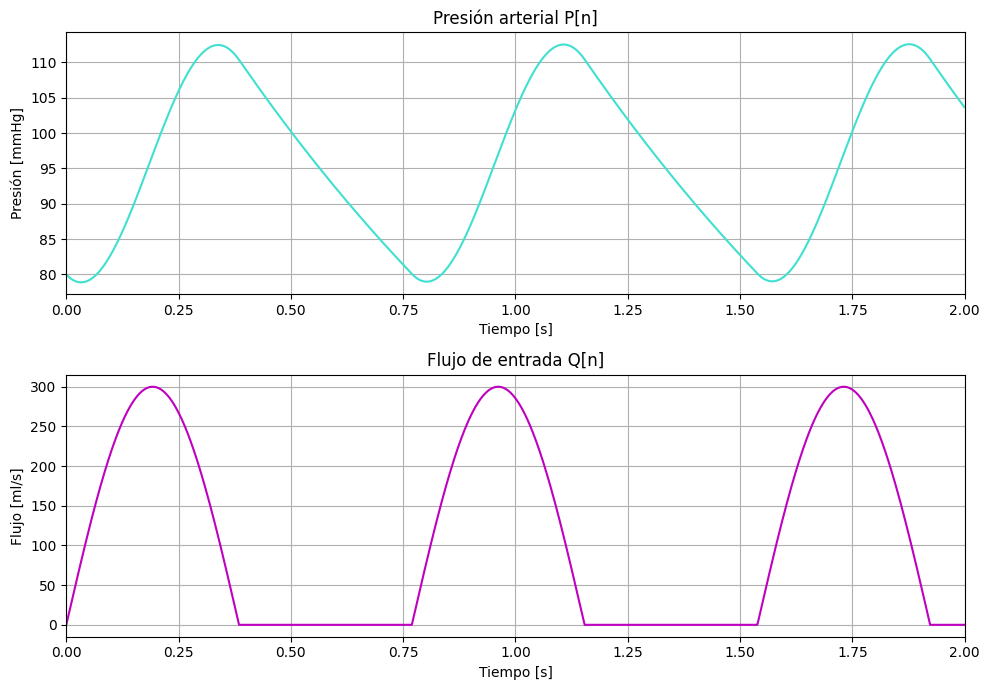

In [14]:
# Parámetros fisiológicos típicos
C = 1.2   # Compliance [L/mmHg]
R = 1      # Resistencia [mmHg·s/ml]

fs_b = 1000          
ts_b = 1/fs_b          
nn_b = 2000         
tt_b = np.arange(nn_b) * ts_b   

# Flujo de entrada Q[n] 
f_q = 1.3
Q = 300 * np.maximum(0, np.sin(2*np.pi*f_q*tt_b))   # [ml/s]


P = np.zeros(nn_b)
P[0] = 80   # condición inicial [mmHg]
for n in range(nn_b-1):
    dP = (1/C) * (Q[n] - (1/R)*P[n])
    P[n+1] = P[n] + ts_b * dP

# Gráficos
fig, axs = plt.subplots(2, 1, figsize=(10,7))

# Presión arterial
axs[0].plot(tt_b, P, color="turquoise")
axs[0].set_xlabel("Tiempo [s]")
axs[0].set_xlim(0, 2)
axs[0].set_ylabel("Presión [mmHg]")
axs[0].set_title("Presión arterial P[n]")
axs[0].grid(True)

# Flujo sanguíneo
axs[1].plot(tt_b, Q, color="m")
axs[1].set_xlabel("Tiempo [s]")
axs[1].set_xlim(0, 2)
axs[1].set_ylabel("Flujo [ml/s]")
axs[1].set_title("Flujo de entrada Q[n]")
axs[1].grid(True)

plt.tight_layout()
plt.show()

Este modelo compara el sistema arterial con un circuito RC eléctrico, donde el Compliance arterial ($C$), que representa la distensibilidad de las arterias, se simula como un condensador, y la Resistencia periférica ($R$), que representa la resistencia al flujo en los vasos pequeños, se modela como una resistencia.

La señal de flujo cardíaco $Q$ simula el bombeo pulsátil con frecuencia de `1.3 Hz`, superpuesto a un flujo basal. Se tomaron como parámetros fisiológicos típicos $C = 1.2 \frac{L}{mmHg}$, $R = 1 \frac{mmHg \cdot s}{ml}$ y un flujo simulado como una onda sinusoidal truncada a valores positivos para imitar la eyección ventricular. 

La ecuación (2) se discretiza utilizando el método de Euler de un paso o aproximación por diferencias finitas y, reemplazando en (3), se obtiene:
$$
\approx \frac{[P(t + \Delta t) - P(t)]}{\Delta t} = (\frac{1}{C}) \cdot (Q(t) - \frac{P(t)}{R})
$$

Para despejar $P(t + \Delta t)$, multiplico de ambos lados por $\Delta t$:
$$
[P(t + \Delta t) - P(t)] = (\frac{\Delta t}{C}) \cdot (Q(t) - \frac{P(t)}{R})
$$

Y queda:
$$
P(t + \Delta t) = (\frac{\Delta t}{C}) \cdot (Q(t) - \frac{P(t)}{R}) + P(t)
$$

En notación discreta, tomando $t + \Delta t = (n+1) \cdot t_s$:
$$
P[n+1] = P[n] + \frac{t_s}{C} \cdot (Q[n] - \frac{P[n]}{R})
$$
donde cada paso de tiempo actualiza la presión en función del flujo y de la descarga a través de la resistencia periférica.

De esta manera, la presión arterial simulada muestra ciclos claramente definidos con valores máximos en la sístole y mínimos durante la diástole, reflejando cómo la eyección ventricular genera aumentos de presión y cómo la elasticidad de las arterias permite su descenso gradual. Los picos de presión se producen ligeramente después de los picos de flujo, debido a la dinámica RC del sistema, y los valores obtenidos ($ \approx $80–120 mmHg) son consistentes con la fisiología normal, indicando que los parámetros elegidos son razonables. 

Este comportamiento refleja la relación entre compliance y resistencia vascular, y permite observar de manera sencilla cómo el sistema arterial convierte un flujo pulsátil en una presión relativamente continua y fisiológicamente coherente.

## Conclusión
En este trabajo se analizaron diferentes sistemas discretos LTI y su respuesta a diversas señales de prueba, así como la simulación de un modelo fisiológico de tipo Windkessel. En la primera parte, se evaluó un sistema definido por la ecuación en diferencias (1), calculando su respuesta al impulso, y comparando las salidas de distintas señales mediante `lfilter` y convolución con $h[n]$, observándose coincidencia entre ambos métodos y confirmando la consistencia del sistema lineal. Se estudiaron señales sinusoidales, moduladas, recortadas, cuadradas y pulsos rectangulares, obteniendo sus energías o potencias, lo que permitió caracterizar el comportamiento del sistema ante distintas formas de entrada.

En la segunda parte, se compararon dos sistemas discretos simples (A y B) con memoria diferida de 10 muestras, mostrando cómo la presencia de retroalimentación (sistema B) modifica significativamente la respuesta temporal respecto a un sistema puramente de convolución (sistema A). Esto evidenció la diferencia entre sistemas con y sin retroalimentación, así como la importancia de la respuesta al impulso en la predicción de la salida.  

Finalmente, se implementó el modelo de Windkessel utilizando el método de Euler de un paso, mostrando cómo un flujo pulsátil simulado genera ciclos de presión arterial periódicos.

En conjunto, este trabajo permitió aplicar técnicas de simulación discreta, análisis de señales y modelado fisiológico, integrando conceptos de procesamiento digital y bioingeniería para estudiar tanto sistemas lineales como dinámicas cardiovasculares simplificadas. Al mismo tiempo, contribuyó a fortalecer los vínculos entre teoría y práctica, y dejó planteada la inquietud de seguir explorando cómo la respuesta al impulso determina el comportamiento frente a diferentes entradas.

## Reflexión personal
Durante la realización de este trabajo comprendí con mayor claridad la diferencia entre los sistemas FIR, que únicamente dependen de la entrada, y los sistemas IIR que, al incorporar términos con la salida, incluyen retroalimentación. Pude entender el funcionamiento de la función `lfilter` y su equivalencia con la convolución directa con la respuesta al impulso del sistema, dos métodos distintos pero coherentes para obtener las salidas.

Se obtuvo la respuesta al impulso y las salidas de tres sistemas diferentes frente a diversas entradas. Un ejemplo que me resultó ilustrativo fue observar cómo un sistema IIR puede prolongar la influencia de una señal de entrada debido a la retroalimentación, mientras que un sistema FIR mantiene una respuesta más acotada. Si bien pude graficar dichas salidas y calcular energía o potencia, se me hizo difícil interpretar en profundidad el efecto de cada sistema sobre una entrada, lo que me motivó a analizar con más detalle sus respuestas al impulso.

Con el objetivo de profundizar en los contenidos teóricos recurrí a la bibliografía recomendada (*Thomas Holton - Digital Signal Processing*) y a las documentaciones de las funciones empleadas en el código, como `lfilter` o `np.convolve`. Además, utilicé ChatGPT para consultar algunos comandos de Python y reforzar los contenidos teóricos, lo que me permitió obtener explicaciones más claras y analizar con mayor seguridad los resultados obtenidos.